In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/adobetraindata/behaviour_simulation_train.csv
/kaggle/input/inter-iit-mid-prep-adobe/behaviour_simulation_train.xlsx
/kaggle/input/inter-iit-mid-prep-adobe/problem_1_test_dataset/content_simulation_test_company.xlsx
/kaggle/input/inter-iit-mid-prep-adobe/problem_1_test_dataset/content_simulation_test_time.xlsx
/kaggle/input/inter-iit-mid-prep-adobe/problem_1_test_dataset/behaviour_simulation_test_time.xlsx
/kaggle/input/inter-iit-mid-prep-adobe/problem_1_test_dataset/behaviour_simulation_test_company.xlsx


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from wordcloud import WordCloud

In [3]:
train_path = '/kaggle/input/adobetraindata/behaviour_simulation_train.csv'
test_path = '/kaggle/input/inter-iit-mid-prep-adobe/problem_1_test_dataset'

In [4]:
train_dataset = pd.read_csv(train_path)

In [5]:
train_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                300000 non-null  int64 
 1   date              300000 non-null  object
 2   likes             300000 non-null  int64 
 3   content           300000 non-null  object
 4   username          300000 non-null  object
 5   media             300000 non-null  object
 6   inferred company  300000 non-null  object
dtypes: int64(2), object(5)
memory usage: 16.0+ MB


In [7]:
train_dataset.describe()

,id,likes
count,300000.000000,300000.000000
mean,150000.500000,773.364793
std,86602.684716,4931.463419
min,1.000000,0.000000
25%,75000.750000,3.000000
50%,150000.500000,76.000000
75%,225000.250000,364.000000
max,300000.000000,560193.000000


In [24]:
train_dataset.head()

,id,date,likes,content,username,media,inferred company
0,1,2020-12-12 00:47:00,1,"Spend your weekend morning with a Ham, Egg, an...",TimHortonsPH,[Photo(previewUrl='https://pbs.twimg.com/media...,tim hortons
1,2,2018-06-30 10:04:20,2750,Watch rapper <mention> freestyle for over an H...,IndyMusic,[Photo(previewUrl='https://pbs.twimg.com/media...,independent
2,3,2020-09-29 19:47:28,57,Canadian Armenian community demands ban on mil...,CBCCanada,[Photo(previewUrl='https://pbs.twimg.com/media...,cbc
3,4,2020-10-01 11:40:09,152,"1st in Europe to be devastated by COVID-19, It...",MKWilliamsRome,[Photo(previewUrl='https://pbs.twimg.com/media...,williams
4,5,2018-10-19 14:30:46,41,Congratulations to Pauletha Butts of <mention>...,BGISD,[Photo(previewUrl='https://pbs.twimg.com/media...,independent


In [27]:
train_dataset[train_dataset['media'].apply(lambda x: 'Gif' in x)]['media'].size

12861

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


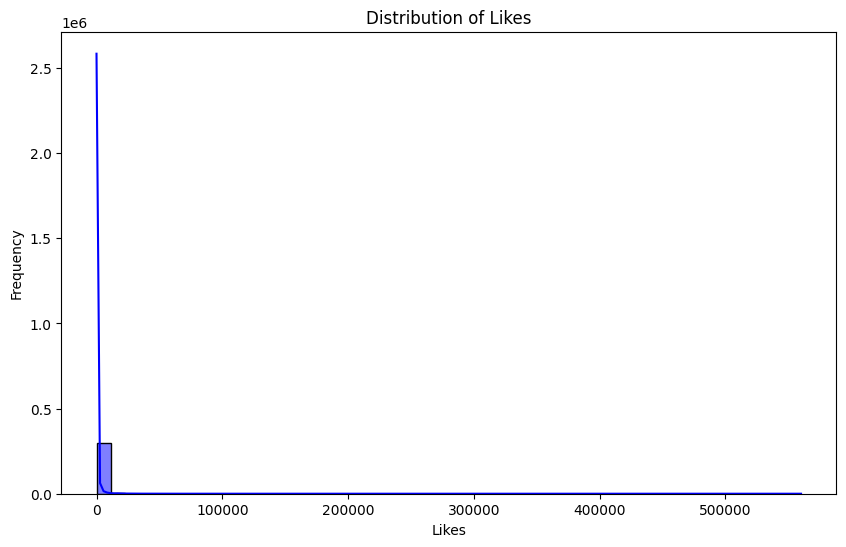

In [10]:
plt.figure(figsize=(10, 6))
sns.histplot(train_dataset['likes'], bins=50, kde=True, color='blue')
plt.title('Distribution of Likes')
plt.xlabel('Likes')
plt.ylabel('Frequency')
plt.show()

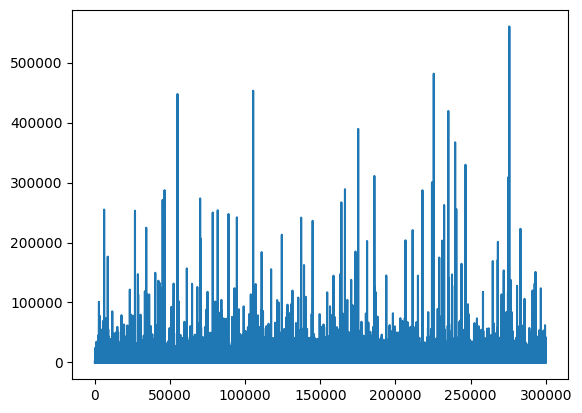

In [46]:
plt.plot(range(300000),train_dataset['likes'])

In [47]:
datetime = pd.to_datetime(train_dataset['date'])

input_data = pd.DataFrame({
        'hour': datetime.dt.hour,
        'day_of_week': datetime.dt.dayofweek,
        'month': datetime.dt.month,
        'year': datetime.dt.year
    })

In [49]:
input_data.head()

,hour,day_of_week,month,year
0,0,5,12,2020
1,10,5,6,2018
2,19,1,9,2020
3,11,3,10,2020
4,14,4,10,2018


In [51]:
# Attempt to convert the 'date' column to datetime format
train_dataset['date'] = pd.to_datetime(train_dataset['date'], errors='coerce')

# Check for any rows where the conversion failed
invalid_dates = train_dataset[train_dataset['date'].isna()]

if not invalid_dates.empty:
    print("Invalid date entries found:")
    print(invalid_dates)


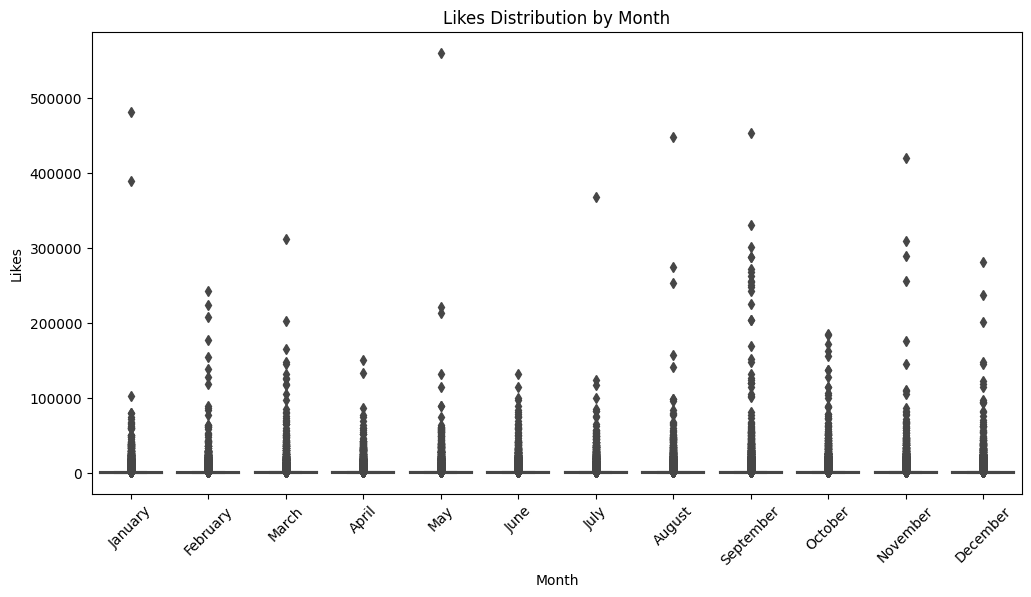

In [52]:
train_dataset['month'] = train_dataset['date'].dt.month_name()  # Use month names instead of numbers

plt.figure(figsize=(12, 6))
sns.boxplot(x='month', y='likes', data=train_dataset, order=['January', 'February', 'March', 'April', 
                                                               'May', 'June', 'July', 'August', 
                                                               'September', 'October', 'November', 'December'])
plt.title('Likes Distribution by Month')
plt.xlabel('Month')
plt.ylabel('Likes')
plt.xticks(rotation=45)
plt.show()

In [55]:
# train_dataset['cumulative_likes'] = train_dataset['likes'].cumsum()

# plt.figure(figsize=(12, 6))
# sns.lineplot(x='date', y='cumulative_likes', data=train_dataset, color='orange')
# plt.title('Cumulative Likes Over Time')
# plt.xlabel('Date')
# plt.ylabel('Cumulative Likes')
# plt.xticks(rotation=45)
# plt.show()


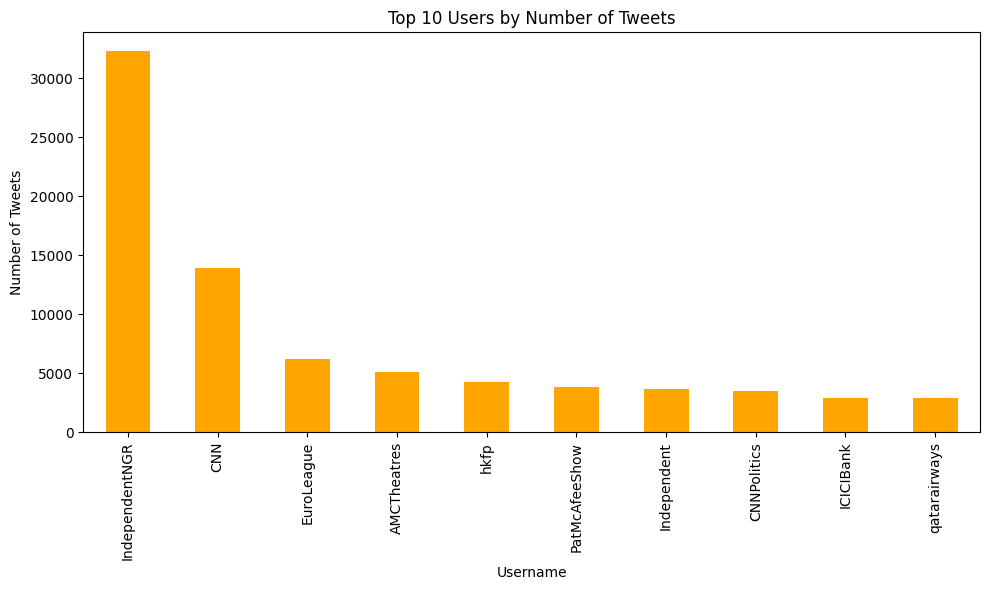

In [18]:
plt.figure(figsize=(10, 6))
train_dataset['username'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()

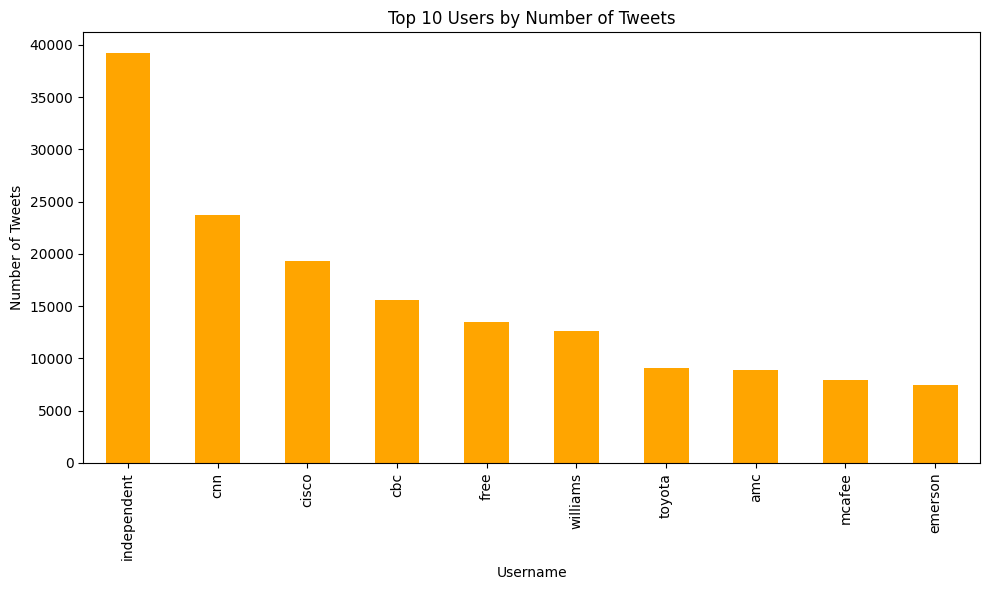

In [6]:
plt.figure(figsize=(10, 6))
train_dataset['inferred company'].value_counts().head(10).plot(kind='bar', color='orange')
plt.title('Top 10 Users by Number of Tweets')
plt.xlabel('Username')
plt.ylabel('Number of Tweets')
plt.tight_layout()
plt.show()

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(train_dataset[['id', 'likes']].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.tight_layout()
plt.show()

In [28]:
train_dataset['media']

0         [Photo(previewUrl='https://pbs.twimg.com/media...
1         [Photo(previewUrl='https://pbs.twimg.com/media...
2         [Photo(previewUrl='https://pbs.twimg.com/media...
3         [Photo(previewUrl='https://pbs.twimg.com/media...
4         [Photo(previewUrl='https://pbs.twimg.com/media...
                                ...                        
299995    [Photo(previewUrl='https://pbs.twimg.com/media...
299996    [Video(thumbnailUrl='https://pbs.twimg.com/med...
299997    [Photo(previewUrl='https://pbs.twimg.com/media...
299998    [Video(thumbnailUrl='https://pbs.twimg.com/med...
299999    [Video(thumbnailUrl='https://pbs.twimg.com/ext...
Name: media, Length: 300000, dtype: object

In [39]:
train_dataset['media'][73701]

"[Video(thumbnailUrl='https://pbs.twimg.com/media/EMGehQHXUAAQSsg.png', variants=[VideoVariant(contentType='video/mp4', url='https://video.twimg.com/ext_tw_video/1207420377514807296/pu/vid/1280x720/M4SdXFUiatl4q3aZ.mp4?tag=10', bitrate=2176000), VideoVariant(contentType='application/x-mpegURL', url='https://video.twimg.com/ext_tw_video/1207420377514807296/pu/pl/WBEh7-v_tTEPAMgW.m3u8?tag=10', bitrate=None), VideoVariant(contentType='video/mp4', url='https://video.twimg.com/ext_tw_video/1207420377514807296/pu/vid/640x360/q-qpVzF7Q3koIm_I.mp4?tag=10', bitrate=832000), VideoVariant(contentType='video/mp4', url='https://video.twimg.com/ext_tw_video/1207420377514807296/pu/vid/480x270/QIJGW9vH-s8Gif9d.mp4?tag=10', bitrate=256000)], duration=135.767, views=3672)]"

In [40]:
train_dataset[train_dataset['media'].apply(lambda x:'Gif' in x)]['media']

45        [Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
77        [Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
90        [Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
105       [Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
138       [Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
                                ...                        
299890    [Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
299949    [Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
299954    [Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
299992    [Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
299993    [Gif(thumbnailUrl='https://pbs.twimg.com/tweet...
Name: media, Length: 12861, dtype: object

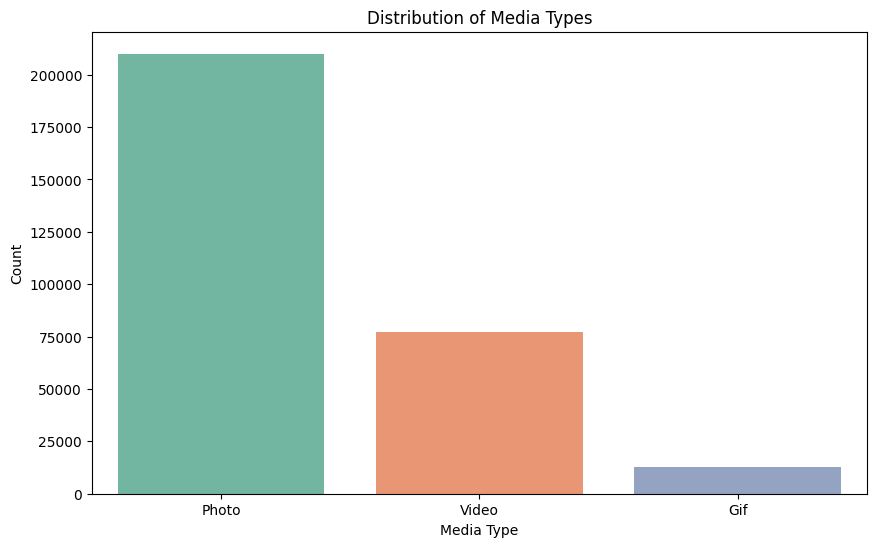

In [43]:

photo_count = train_dataset[train_dataset['media'].apply(lambda x: '[Photo(' in x)]['media'].count()
video_count = train_dataset[train_dataset['media'].apply(lambda x: '[Video(' in x)]['media'].count()
gif_count = train_dataset[train_dataset['media'].apply(lambda x: '[Gif(' in x)]['media'].count()

media_counts = {
    'Photo': photo_count,
    'Video': video_count,
    'Gif': gif_count
}

media_df = pd.DataFrame(list(media_counts.items()), columns=['Media Type', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(x='Media Type', y='Count', data=media_df, palette='Set2')
plt.title('Distribution of Media Types')
plt.xlabel('Media Type')
plt.ylabel('Count')
plt.show()

/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/conda/lib/python3.10/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


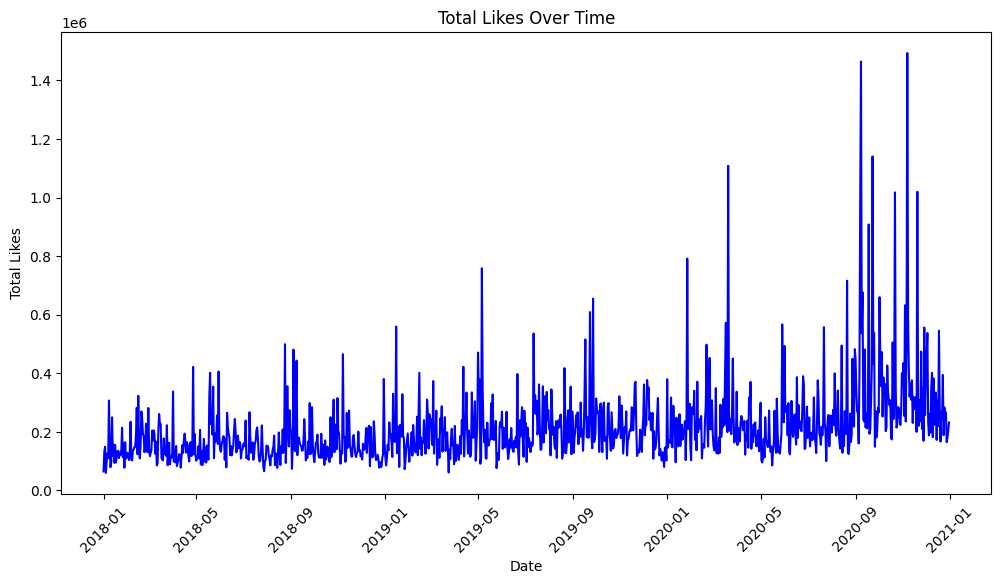

In [5]:
# Convert 'date' column to datetime if not already in datetime format
train_dataset['date'] = pd.to_datetime(train_dataset['date'])

# Group by date and sum the likes
likes_by_date = train_dataset.groupby(train_dataset['date'].dt.date)['likes'].sum().reset_index()

# Rename the columns for better readability
likes_by_date.columns = ['date', 'total_likes']

# Plot the total likes over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='total_likes', data=likes_by_date, color='blue')
plt.title('Total Likes Over Time')
plt.xlabel('Date')
plt.ylabel('Total Likes')
plt.xticks(rotation=45)
plt.show()